In [268]:
#! pip install kaggle

In [269]:
# configuring the path of Kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


In [270]:
# import kagglehub
# import os
# import pandas as pd
# import shutil

# # Step 1: Download dataset
# path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")
# print("Path to dataset files:", path)

# # Step 2: List files in the dataset folder
# files = os.listdir(path)
# print("Files in dataset folder:", files)

# # Step 3: Find the CSV file (modify if needed)
# csv_file = None
# for file in files:
#     if file.endswith(".csv"):
#         csv_file = os.path.join(path, file)
#         break

# # Step 4: If CSV is found, load it into Pandas
# if csv_file:
#     df = pd.read_csv(csv_file)
#     print("CSV file loaded successfully!")
#     print(df.head())  # Show first few rows

#     # Step 5: Move the CSV to Google Colab's /content/ directory for easy access
#     destination = "/content/amazon_reviews.csv"
#     shutil.copy(csv_file, destination)
#     print(f"File moved to: {destination}")

#     # Now you can load it directly with:
#     df = pd.read_csv(destination)
# else:
#     print("No CSV file found in the dataset folder.")


## IMPORT LIBRARIES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


## LOAD DATASET

In [3]:
data=pd.read_csv("amazon_reviews.csv")
data.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [5]:
data.columns = ["Rating", "Title", "Review"]
data.head()

,Rating,Title,Review
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [7]:
data["Review"] = data["Title"] + " " + data["Review"]
data = data[['Review', 'Rating']]
data.head()

,Review,Rating
0,One of the best game music soundtracks - for a...,2
1,Batteries died within a year ... I bought this...,1
2,"works fine, but Maha Energy is better Check ou...",2
3,Great for the non-audiophile Reviewed quite a ...,2
4,DVD Player crapped out after one year I also b...,1


In [9]:
def sentiment(label):
    if label==1:
        return "Negative"
    elif label==2:
        return "Positive"
    else:
        return "Neutral"

In [11]:
data['Sentiment'] = data["Rating"].apply(sentiment)
data.head(10)

,Review,Rating,Sentiment
0,One of the best game music soundtracks - for a...,2,Positive
1,Batteries died within a year ... I bought this...,1,Negative
2,"works fine, but Maha Energy is better Check ou...",2,Positive
3,Great for the non-audiophile Reviewed quite a ...,2,Positive
4,DVD Player crapped out after one year I also b...,1,Negative
5,"Incorrect Disc I love the style of this, but a...",1,Negative
6,DVD menu select problems I cannot scroll throu...,1,Negative
7,Unique Weird Orientalia from the 1930's Exotic...,2,Positive
8,"Not an ""ultimate guide"" Firstly,I enjoyed the ...",1,Negative
9,Great book for travelling Europe I currently l...,2,Positive


In [13]:
data.value_counts("Sentiment")


Sentiment
Negative    200000
Positive    199999
Name: count, dtype: int64

C:\Users\ramku\AppData\Local\Temp\ipykernel_30572\2232071794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data,  palette=["#3498db", "#e74c3c", "#2ecc71"])
C:\Users\ramku\AppData\Local\Temp\ipykernel_30572\2232071794.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x="Sentiment", data=data,  palette=["#3498db", "#e74c3c", "#2ecc71"])


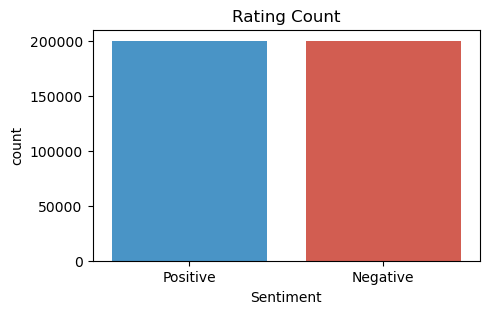

In [15]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x="Sentiment", data=data,  palette=["#3498db", "#e74c3c", "#2ecc71"])
plt.title("Rating Count")
plt.show()

In [18]:
data.isna().sum()
data = data.fillna(' ')
data.isna().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

## Sampling the data

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["Sentiment"]):
    strat_data = data.reindex(train_index)

In [22]:
strat_data.head(10)


,Review,Rating,Sentiment
88350,Leaks like a sieve after 2 weeks and no help f...,1,Negative
84189,Do not buy this phone. Both the handset cord a...,1,Negative
209190,Lost it and copped it a 3rd time! I purchased ...,2,Positive
117550,Fits the PalmT/X Fits the Palm T/X palm pilot....,2,Positive
375606,"Even more awful mallcore music... Okay really,...",1,Negative
165772,This book stinks I enjoyed this author's first...,1,Negative
189512,Good Performance and Capacity Is the perfect P...,2,Positive
240358,Not as useful as said I am dissapointed with t...,1,Negative
259338,Text books only go so far Text books can only ...,2,Positive
203543,Was the author as drunk as the main character?...,1,Negative


In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemme

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

def preprocess_text(text):
    
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside square brackets
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)  # Tokenize text
    #Stemming
    filtered_words = [word for word in words if word not in stop_words]
   
    #ps=PorterStemmer()
    #Stemmed_words = [ps.stem(word) for word in filtered_words]
    # Lemmatization
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
strat_data["Review"] = strat_data["Review"].apply(preprocess_text)
strat_data.head(10)

,Review,Rating,Sentiment
88350,leak like sieve week help kohler feel cheap pu...,1,Negative
84189,buy phone handset cord line cord permanently c...,1,Negative
209190,lost copped rd time purchased retail cd case s...,2,Positive
117550,fit palmtx fit palm tx palm pilot inside case ...,2,Positive
375606,even awful mallcore music okay really band lik...,1,Negative
165772,book stink enjoyed author first book read list...,1,Negative
189512,good performance capacity perfect pda power us...,2,Positive
240358,useful said dissapointed product two position ...,1,Negative
259338,text book go far text book bring far yet book ...,2,Positive
203543,author drunk main character sure plot line lit...,1,Negative


## WORD CLOUD

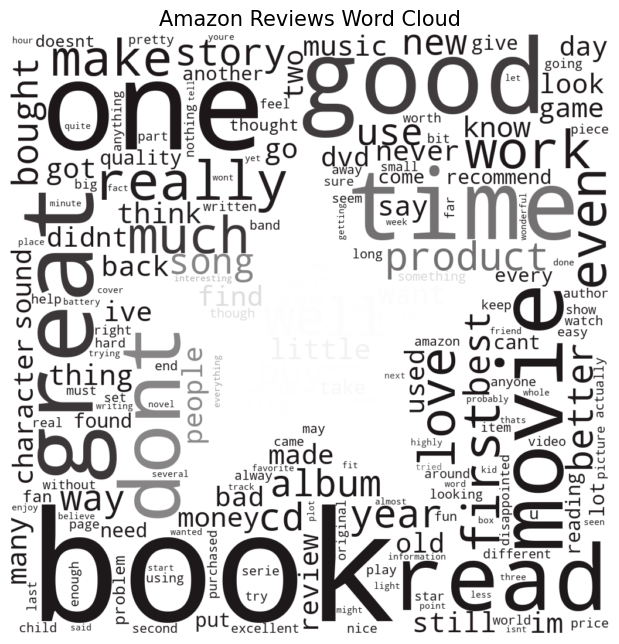

In [47]:
from PIL import Image
import requests
from wordcloud import WordCloud, ImageColorGenerator

txt = "".join(strat_data["Review"].tolist())
len(txt)
amazon_mask = np.array(Image.open(r"C:\Users\ramku\Downloads\wordcloud.webp"))

wc = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=amazon_mask).generate(txt)
image_colors = ImageColorGenerator(amazon_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.title("Amazon Reviews Word Cloud", fontsize = 15)
plt.savefig('wordcloud.png')
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(strat_data["Review"]).toarray()

## TRAIN TEST SPLIT

Training model with 100 samples...
Training model with 500 samples...
Training model with 1000 samples...
Training model with 5000 samples...
Training model with 10000 samples...
Training model with 50000 samples...
Training model with 100000 samples...


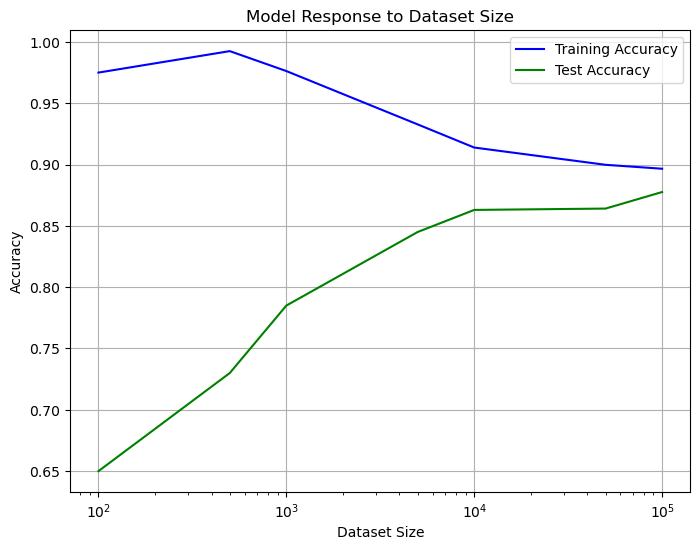

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix  # Save memory


dataset_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]


train_accuracies = []
test_accuracies = []

for size in dataset_sizes:
    print(f"Training model with {size} samples...")

   
    strat_data_sample = strat_data.sample(n=size, random_state=42)
    X_sample = tfidf.transform(strat_data_sample["Review"])  # Transform using pre-fitted TF-IDF
    y_sample = strat_data_sample["Sentiment"].map({"Positive": 1, "Negative": 0})  # Convert labels

   
    X_sample = csr_matrix(X_sample.astype("float32"))

   
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

   
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


plt.figure(figsize=(8,6))
plt.plot(dataset_sizes, train_accuracies, label="Training Accuracy", color="blue")
plt.plot(dataset_sizes, test_accuracies, label="Test Accuracy", color="green")

plt.xscale("log")  
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.title("Model Response to Dataset Size")
plt.legend()
plt.grid(True)
plt.show()


## MODEL TRAINING

In [30]:
y=strat_data["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

## METRICS

In [34]:
y_pred = classifier.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.8851625

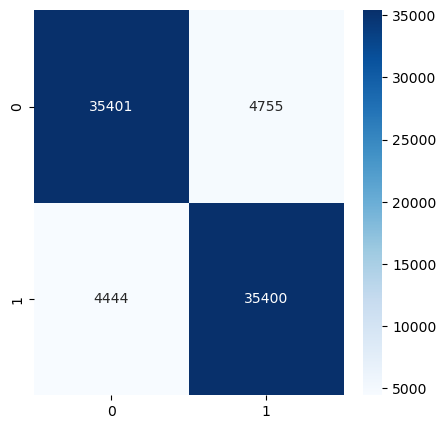

In [39]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


precision = precision_score(y_test, y_pred, pos_label="Positive")
recall = recall_score(y_test, y_pred, pos_label="Positive")
f1 = f1_score(y_test, y_pred, pos_label="Positive")

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print(classification_report(y_test, y_pred))


Precision: 0.8815838625326858
Recall: 0.8884650135528561
F1 Score: 0.885011062638283
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.89     40156
    Positive       0.88      0.89      0.89     39844

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000

